In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split

## Read dataset

In [154]:
df = pd.read_csv("occupancy_dataset/datatraining.txt", index_col = 0)
df.reset_index(drop=True, inplace=True)
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [155]:
print(f'Shape of dataframe: {df.shape}')
df.describe()

Shape of dataframe: (8143, 7)


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [156]:
# Number of null values in each column
df.isna().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

## Splitting the dataset and Applying PCA
#### Question 1,2

In [157]:
X, y = df.iloc[:,1:-1], df.iloc[:,-1]
X.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
0,23.18,27.2720,426.0,721.25,0.004793
1,23.15,27.2675,429.5,714.00,0.004783
2,23.15,27.2450,426.0,713.50,0.004779
3,23.15,27.2000,426.0,708.25,0.004772
4,23.10,27.2000,426.0,704.50,0.004757


In [158]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC_1', 'PC_2'])


In [159]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,PC_1,PC_2,Occupancy
0,239.754151,222.700217,1
1,234.837346,229.073523,1
2,232.823636,226.168071,1
3,228.128650,228.517767,1
4,224.775187,230.195464,1


In [160]:
X, y = finalDf.iloc[:,:-1], finalDf.iloc[:,-1]

In [161]:
X_train, X_test_valid, y_train, y_test_valid = train_test_split(
        X, y, test_size=0.30, random_state=0)

In [162]:
X_valid, X_test, y_valid, y_test = train_test_split(
        X_test_valid, y_test_valid, test_size=0.67, random_state=0)

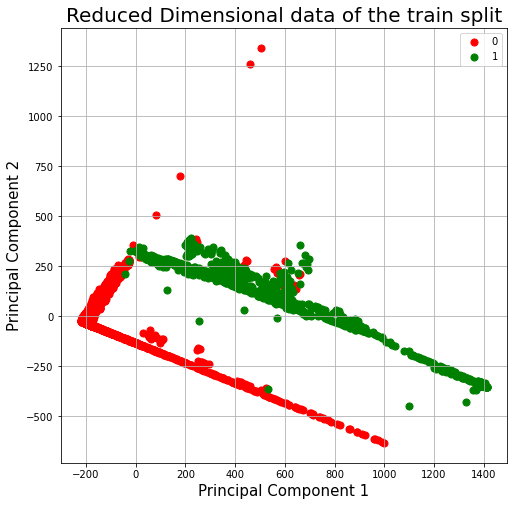

In [165]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Reduced Dimensional data of the train split', fontsize = 20)

targets = y_train.unique()
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = [row_idx for row_idx, row in enumerate(y_train[:]) if row == target]
    ax.scatter(X_train.iloc[indicesToKeep, 0]
               , X_train.iloc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [168]:
print(len(X_train))

5700


In [167]:
# Laptop fat jayega, abhi toh nahi chalaya

# from sklearn import svm

# #Create a svm Classifier
# clf = svm.SVC(kernel='linear') # Linear Kernel

# #Train the model using the training sets
# clf.fit(X_train, y_train)



# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics

# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

KeyboardInterrupt: 